In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

VPRM_old_or_new = "migli"
version = "V11"
region = "Alps" #  "Alps" or  "Europe"

R2_lt_zero = True # test so see results for R2_lt_zero - default: True (deletes sites below zero R2) 

run_ID = region+"_VPRM_optimized_params_diff_evo_"+version+"b_100"
base_path = "/home/madse/Downloads/Fluxnet_Data/all_tuned_params/" + run_ID 

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith(VPRM_old_or_new+'_diff_evo_'+version+'_100.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)


In [31]:
base_path

'/home/madse/Downloads/Fluxnet_Data/all_tuned_params/Alps_VPRM_optimized_params_diff_evo_V11b_100'

In [32]:

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith(VPRM_old_or_new+'_diff_evo_'+version+'_100.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)


In [33]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [34]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

df_parameters_nn = df_parameters.copy()
df_parameters_nn = df_parameters_nn.dropna()
font_size = 12
color_palette = sns.color_palette('bright')
pft_colors = {
    'CRO': color_palette[8], 
    'DBF': color_palette[0], 
    'ENF': color_palette[9],
    'MF': color_palette[4], 
    'GRA': color_palette[2],     
    'SHB': color_palette[7],
    'WET': color_palette[3]
}



In [35]:
df_parameters_nn = df_parameters_nn[df_parameters_nn["Topt"] < 1 ]

print(df_parameters_nn["Topt"]-df_parameters_nn["T_mean"])

Series([], dtype: float64)


In [36]:
if R2_lt_zero:
    print(f"Number of deleted site years due to R2_NEE < 0 = {sum(df_parameters['R2_NEE'] < 0)}")
    df_parameters = df_parameters[df_parameters["R2_NEE"] > 0]
    df_parameters.reset_index(drop=True, inplace=True)
    str_R2_lt_zero = ""
else:
    print(f"Number of deleted site years due to R2_NEE > 0 = {sum(df_parameters['R2_NEE'] < 0)}")
    df_parameters = df_parameters[df_parameters["R2_NEE"] < 0]
    df_parameters.reset_index(drop=True, inplace=True)
    str_R2_lt_zero = "_R2_lt_zero"


Number of deleted site years due to R2_NEE < 0 = 0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

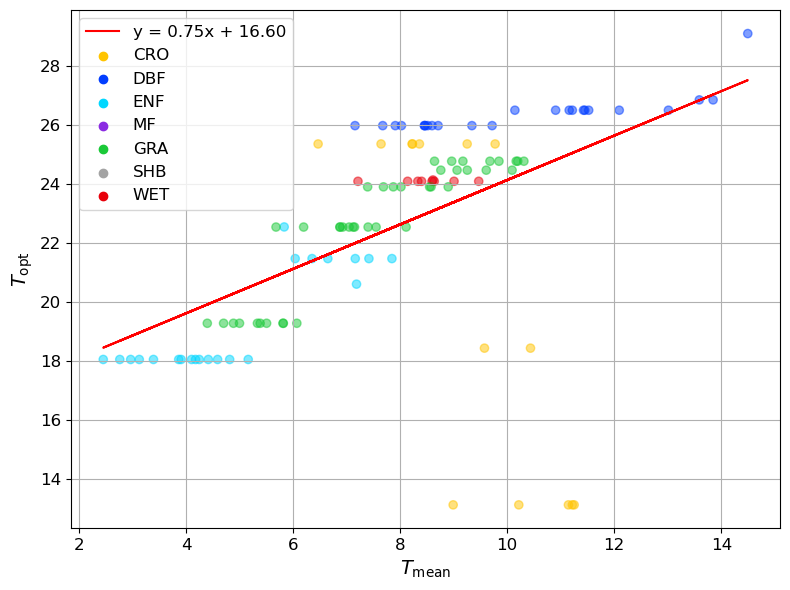

In [37]:

font_size = 12
plt.figure(figsize=(8, 6))
plt.scatter(df_parameters["T_mean"], df_parameters["Topt"], alpha=0.5, c=df_parameters["PFT"].map(pft_colors))
coefficients = np.polyfit(df_parameters["T_mean"], df_parameters["Topt"], 1)
poly = np.poly1d(coefficients)
plt.plot(df_parameters["T_mean"], poly(df_parameters["T_mean"]), color='red', label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
equation_regression = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
equation_normal = 'y = x'
plt.xlabel(r'$T_{\mathrm{mean}}$',fontsize=font_size+2)
plt.ylabel(r'$T_{\mathrm{opt}}$',fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(True)

for pft, color in pft_colors.items():
    plt.scatter([], [], c=color, label=pft)  # Create an empty scatter plot for each PFT label

plt.legend(fontsize=font_size)
plt.tight_layout()
plt.savefig(
    base_path 
    + "/regression_Topt_vs_Tmean_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

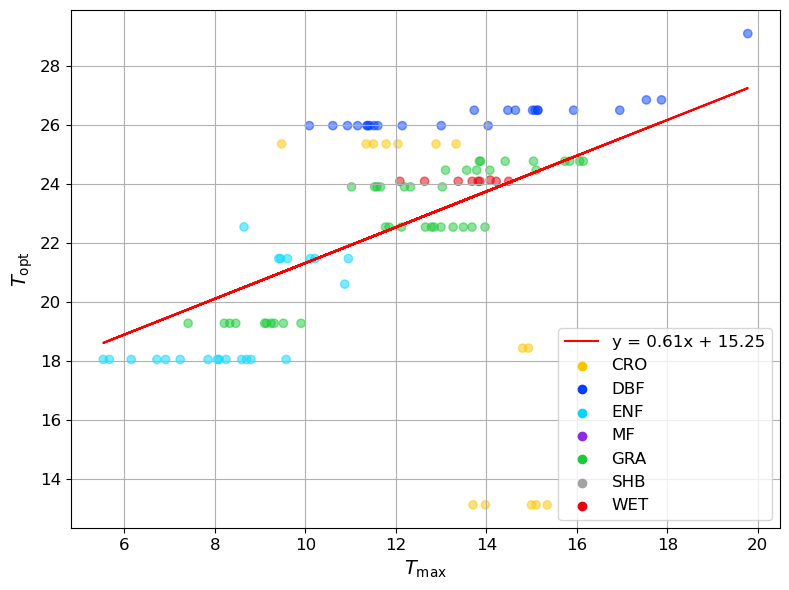

In [38]:


plt.figure(figsize=(8, 6))
plt.scatter(df_parameters["T_max"].dropna(), df_parameters["Topt"].dropna(), alpha=0.5, c=df_parameters["PFT"].map(pft_colors))
coefficients = np.polyfit(df_parameters["T_max"], df_parameters["Topt"], 1)
poly = np.poly1d(coefficients)
plt.plot(df_parameters["T_max"], poly(df_parameters["T_max"]), color='red', label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
equation_regression = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
equation_normal = 'y = x'
plt.xlabel(r'$T_{\mathrm{max}}$',fontsize=font_size+2)
plt.ylabel(r'$T_{\mathrm{opt}}$',fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.grid(True)

for pft, color in pft_colors.items():
    plt.scatter([], [], c=color, label=pft)  # Create an empty scatter plot for each PFT label

plt.legend(fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/regression_Topt_vs_Tmax_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

In [39]:
if VPRM_old_or_new == "new":
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha1",
        "alpha2",
        "beta",
        "T_crit",
        "T_mult",
        "gamma",
        "theta1",
        "theta2",
        "theta3",
    ]
elif VPRM_old_or_new == "old":
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha",
        "beta",
    ]
elif VPRM_old_or_new == "migli": 
    parameters_to_plot = [
                "RLAI",
                "alphaLAI",
                "k2",
                "E0(K)",
                "alpha",
                "K (mm)",
    ]

In [40]:
# Define the color palette and the PFT color mapping

df_parameters.sort_values(by="PFT", inplace=True)
color_palette = sns.color_palette('bright')
# Create a list of colors for the boxplot based on the sorted PFTs
pft_order = df_parameters['PFT'].unique()
colors = [pft_colors[pft] for pft in pft_order]


In [41]:
df_parameters

,site_ID,PFT,Year,Topt,RLAI,alphaLAI,k2,E0(K),alpha,K (mm),...,RMSE_GPP,RMSE_Reco,RMSE_NEE,AIC,NSE_NEE,T_mean,T_max,lat,lon,elev
58,FR-Gri,CRO,2006,13.112500,0.000976,0.589954,0.106538,133.816951,1.000605,0.039990,...,2.414282,1.993170,2.585441,22.118029,0.850144,11.250763,15.344301,48.8442,1.9519,"125,000000"
57,FR-Gri,CRO,2005,13.112500,0.750000,0.697105,0.061000,194.247000,0.996590,0.040611,...,4.542737,3.074867,4.560184,20.983095,0.612916,11.143413,15.100273,48.8442,1.9519,"125,000000"
40,DE-Kli,CRO,2005,25.355556,0.750000,0.700000,0.061000,194.247000,0.997297,0.061250,...,3.320374,3.039223,3.637873,21.435023,0.761935,9.774128,13.331635,50.8929,13.5225,"478,000000"
41,DE-Kli,CRO,2006,25.355556,0.750000,0.700000,0.064677,160.505045,0.955038,0.008750,...,2.295886,2.832058,2.532671,22.159273,0.836144,8.228677,11.502832,50.8929,13.5225,"478,000000"
42,DE-Kli,CRO,2007,25.355556,0.750000,0.648261,0.061000,194.247000,0.999530,0.061250,...,1.786505,2.373295,1.966603,22.665206,0.879890,8.222651,11.783798,50.8929,13.5225,"478,000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,CZ-wet,WET,2009,24.088889,-0.208041,0.348963,0.147302,142.093485,0.965060,0.047827,...,1.699092,1.918306,2.480058,22.201258,0.700680,8.329345,13.379008,49.0247,14.7704,"426,000000"
13,CZ-wet,WET,2010,24.088889,-0.092694,0.143645,0.166109,182.192886,0.493098,0.037347,...,1.923355,1.836463,2.691731,22.037453,0.681288,7.210771,12.089256,49.0247,14.7704,"426,000000"
15,CZ-wet,WET,2012,24.088889,1.403094,0.473044,0.453177,131.901178,0.895264,0.074038,...,2.234475,3.574995,3.050611,21.787138,0.662442,8.594401,13.687123,49.0247,14.7704,"426,000000"
17,CZ-wet,WET,2014,24.088889,1.905765,0.564052,0.640709,96.428135,0.759513,0.044575,...,2.317580,4.447466,2.449722,22.225872,0.633826,9.467102,14.493151,49.0247,14.7704,"426,000000"


/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

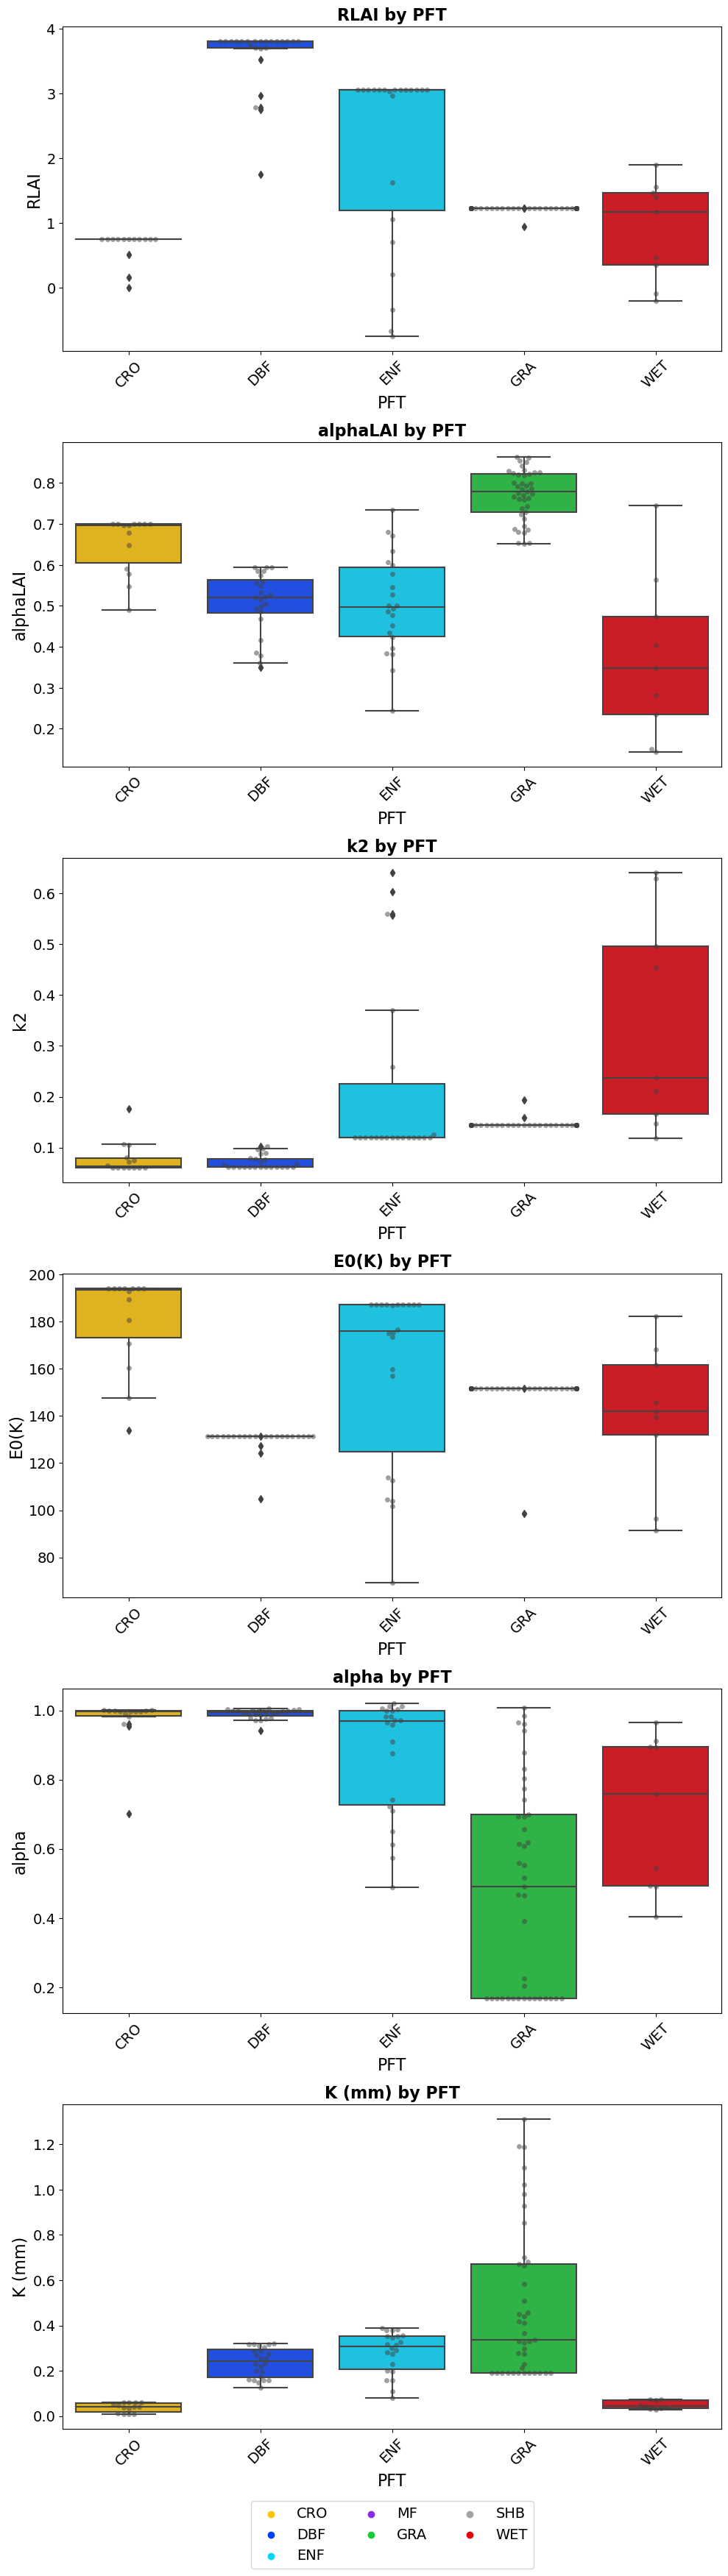

In [42]:

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    font_size = 12
elif VPRM_old_or_new == "old":
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
    font_size = 14
elif VPRM_old_or_new == "migli":    
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 35))
    font_size = 14

axes = axes.flatten()
for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i],palette=colors) 
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT',fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('PFT',fontsize=font_size+2)
    axes[i].set_ylabel(parameter,fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)



handles = []
for pft, color in pft_colors.items():
    handles.append(plt.scatter([], [], c=color, label=pft))

plt.legend(handles=handles, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(pft_colors)//2, fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/boxplot_PFTs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

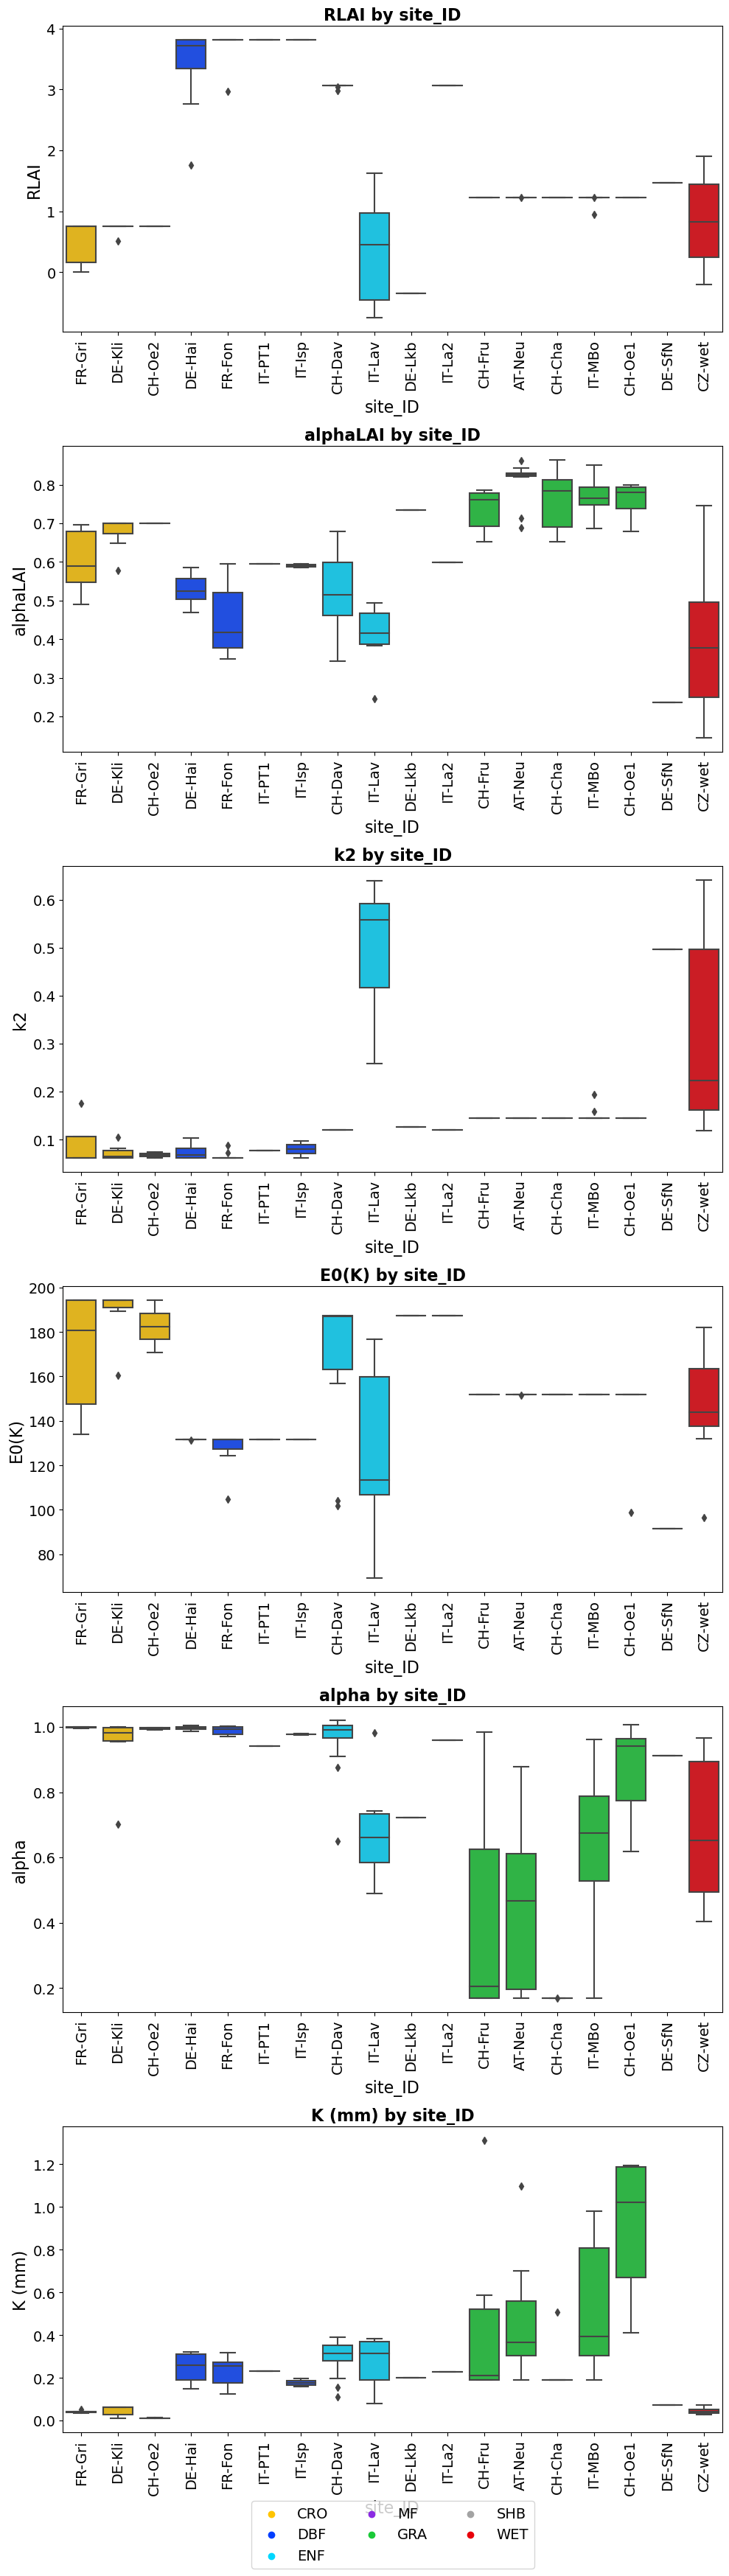

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary mapping site_ID to PFT
site_to_pft = df_parameters.set_index('site_ID')['PFT'].to_dict()

# Create a list of colors for each site based on the PFT
site_colors = [pft_colors[site_to_pft[site]] for site in df_parameters['site_ID'].unique()]

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
elif VPRM_old_or_new == "old":
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
    font_size = 14
elif VPRM_old_or_new == "migli":    
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 35))
    font_size = 14
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='site_ID', y=parameter, data=df_parameters, ax=axes[i], palette=site_colors)
    #sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, color="0.15", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by site_ID', fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('site_ID', fontsize=font_size+2)
    axes[i].set_ylabel(parameter, fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)
    if VPRM_old_or_new == "new":
        axes[i].tick_params(axis='x', which='major', labelsize=font_size-5)

# Create legend handles
handles = []
for pft, color in pft_colors.items():
    handles.append(plt.scatter([], [], c=color, label=pft))

plt.legend(handles=handles, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=len(pft_colors)//2, fontsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_siteIDs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
plt.show()


In [44]:
grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_params_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".xlsx", index=False)

In [45]:

# Pivoting the DataFrame
pivoted_mean = mean_median_df.pivot(index='Parameter', columns='PFT', values='Mean')
pivoted_median = mean_median_df.pivot(index='Parameter', columns='PFT', values='Median')

# Exporting to CSV
pivoted_mean.to_csv(base_path + "/"+region+"_parameters_mean_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".csv")
pivoted_median.to_csv(base_path + "/"+region+"_parameters_median_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".csv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

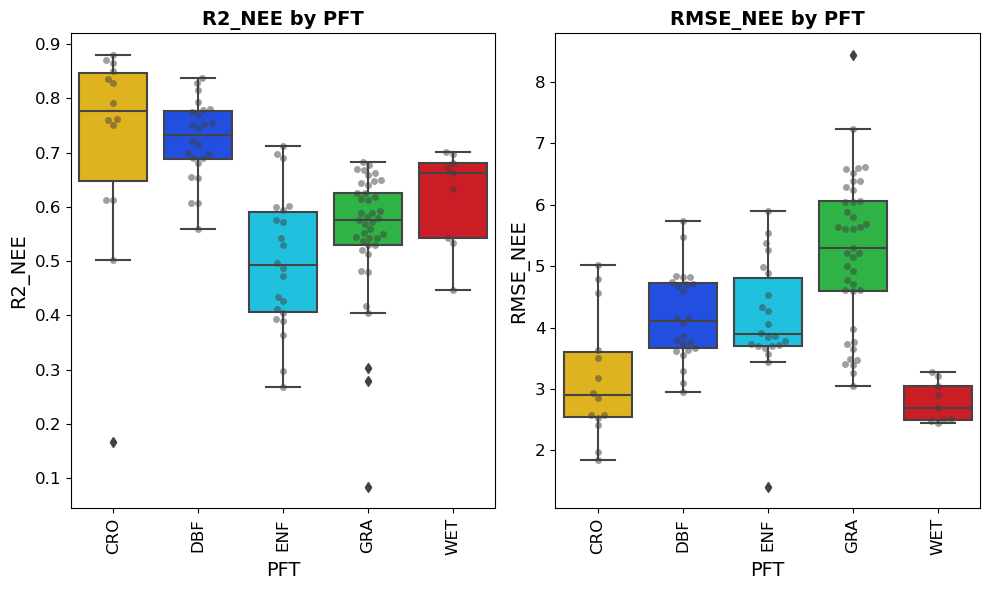

In [46]:

parameters_to_plot = ['R2_GPP', 'R2_Reco', 'R2_NEE', 'RMSE_GPP', 'RMSE_Reco', 'RMSE_NEE']
font_size = font_size-2
grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_R2_RMSE_"+ VPRM_old_or_new+ "_"+run_ID+str_R2_lt_zero+".xlsx", index=False)

parameters_to_plot = [ 'R2_NEE', 'RMSE_NEE']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i],palette=colors)
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT', fontsize=font_size+2, weight='bold')
    axes[i].set_xlabel('PFT', fontsize=font_size+2)
    axes[i].set_ylabel(parameter, fontsize=font_size+2)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].tick_params(axis='both', which='major', labelsize=font_size)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_R2_RMSE_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + str_R2_lt_zero
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)